In [484]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as nm
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [485]:
print("\tAnthony Fantano aka 'Theneedledrop' aka 'The Melon' is one of YouTube's most popular music reviewers.\n\
       He reviews a wide variety of music from Hip-Hop to Indie with a bit of humor. I thought it would be \n\
       be interesting to compare the statistics of his reviews and the artists who he reviews. I used data of\n\
       about 1700 reviews from 2010 to 2018 to formulate the relations.")

	Anthony Fantano aka 'Theneedledrop' aka 'The Melon' is one of YouTube's most popular music reviewers.
       He reviews a wide variety of music from Hip-Hop to Indie with a bit of humor. I thought it would be 
       be interesting to compare the statistics of his reviews and the artists who he reviews. I used data of
       about 1700 reviews from 2010 to 2018 to formulate the relations.


In [486]:
print("\tData Dictionary : \n\
       Column 1 : sl_no       : It gives the number of reviews starting from 0.\n\
       Column 2 : title       : This column displays the Title of the Record.\n\
       Column 3 : artist      : This column gives information about the Arist of the Record.\n\
       Column 4 : review_date : It tells the date when the album was reviewed.\n\
       Column 5 : review_type : This column tells what type of Record was reviewed(Album, EP)\n\
       Column 6 : score       : It represents the score given to that particular Record by Anothony Fantano.\n\
       Column 7 : word_score  : Since he doesn't always give a score he also rates an album by a word.\n\
       Column 8 : best_tracks : This column showcases all the tracks that Anthony Fantano thought were \n\
                                the best in the Record.\n\
       Column 9 : worst_track : This colmun displays the name of the worst tracks on the Record according to him.\n\
       Column 10: link        : The link of the YouTube Video.") 

	Data Dictionary : 
       Column 1 : sl_no       : It gives the number of reviews starting from 0.
       Column 2 : title       : This column displays the Title of the Record.
       Column 3 : artist      : This column gives information about the Arist of the Record.
       Column 4 : review_date : It tells the date when the album was reviewed.
       Column 5 : review_type : This column tells what type of Record was reviewed(Album, EP)
       Column 6 : score       : It represents the score given to that particular Record by Anothony Fantano.
       Column 7 : word_score  : Since he doesn't always give a score he also rates an album by a word.
       Column 8 : best_tracks : This column showcases all the tracks that Anthony Fantano thought were 
                                the best in the Record.
       Column 9 : worst_track : This colmun displays the name of the worst tracks on the Record according to him.
       Column 10: link        : The link of the YouTube Video.


In [487]:
melon = pd.read_csv("fantano_reviews.csv")
melon = melon.fillna('')
melon.head()

,Unnamed: 0,title,artist,review_date,review_type,score,word_score,best_tracks,worst_track,link
0,0,Cosmogramma,Flying Lotus,2010-05-05,Album,8,,[],,https://www.youtube.com/watch?v=KCuamde9Atc
1,1,Throat,Little Women,2010-05-09,Album,9,,[],,https://www.youtube.com/watch?v=cndwH6byJnk
2,2,Latin,Holy Fuck,2010-05-10,Album,7,,[],,https://www.youtube.com/watch?v=ySXryTlo9Ac
3,3,High Violet,The National,2010-05-11,Album,6,,[],,https://www.youtube.com/watch?v=DuMUDldrG3g
4,4,At Echo Lake,Woods,2010-05-12,Album,8,,[],,https://www.youtube.com/watch?v=ncrpTX6jR5w


The average score handed out by Anthony Fantano is found to be 6.376187460417986
The average score is found to be a bit less compared to sites such as Pitchfork (shown later)


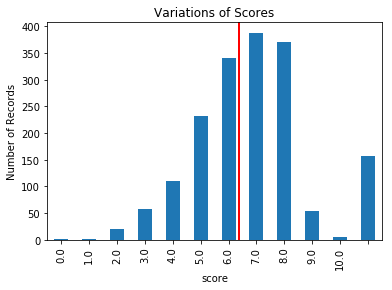

In [488]:
#creating a data frame, score_sizes with 2 columns : score and number of records.
score_sizes = melon.groupby('score')
score_sizes = score_sizes.size()
score_sizes = pd.DataFrame(score_sizes)

#creating a bar graph : x axis is score and y axis is number
score_sizes.plot(kind = 'bar', legend = False)
plt.ylabel("Number of Records")
plt.title('Variations of Scores')

#creating a line to display the average score : 6.376187460417986
melon[['score']] = melon[['score']].apply(pd.to_numeric)
avg = float(melon[['score']].mean())
plt.axvline(x = avg, ymin = -10, ymax = 400, linewidth = 2, color = 'r')

print("The average score handed out by Anthony Fantano is found to be",avg)
print("The average score is found to be a bit less compared to sites such as Pitchfork (shown later)")

The top bands reviewed by Anthony Fantano


,artist,no
0,Death Grips,9
1,Big K.R.I.T.,7
2,The Weeknd,6
3,Chelsea Wolfe,5
4,Mac Miller,5
5,of Montreal,5
6,Mount Eerie,5
7,J. Cole,5
8,The Underachievers,5


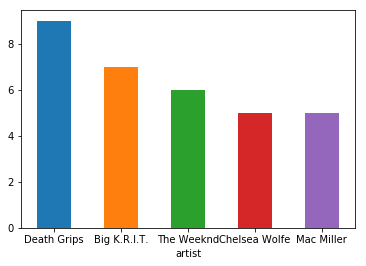

In [489]:
no = melon['artist'].value_counts().tolist()
artists = melon['artist'].value_counts().keys().tolist()
no_artists = pd.DataFrame({'artist':artists,'no':no})
yes = no_artists.loc[no_artists['no'] > 4]
yes[:5].plot.bar(x='artist',y='no',rot=0,legend=False)
print("The top bands reviewed by Anthony Fantano")
yes

The average of all the bands that have been reviewed once : score    6.288862
dtype: float64
The average of all the bands that have been reviewed more than once : score    6.469816
dtype: float64


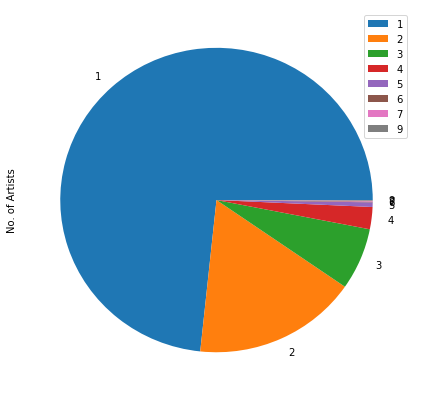

In [490]:
times=no_artists['no'].value_counts().tolist()
nos=[1,2,3,4,5,6,7,9]
timedf = pd.DataFrame({'No. of times reviewed':nos,'No. of Artists':times},index=[1,2,3,4,5,6,7,9])
timedf.plot.pie(y='No. of Artists',figsize=(7,7))
timedf

#average score for albums that were reviewed once
copy = melon
copy1 = melon
pres1ce = no_artists.loc[no_artists['no'] == 1]
pres1ce = pres1ce['artist'].tolist()
def pres(x):
    if x in pres1ce:
        return 1
    else:
        return ''
def notpres(x):
    if x not in pres1ce:
        return 2
    else:
        return ''
copy['times'] = melon['artist'].apply(lambda x:pres(x))
copy = copy.loc[copy['times'] == 1]
avg1 = copy[['score']].mean()
copy1['times'] = melon['artist'].apply(lambda x:notpres(x))
copy1 = copy1.loc[copy1['times'] == 2]
avg2 = copy1[['score']].mean()
print("The average of all the bands that have been reviewed once :",avg1)
print("The average of all the bands that have been reviewed more than once :",avg2)

According to the data, we see that Anthony Fantano mostly reviews bands just once. I first thought this was
because the artists had made only one record so far, but a quick search showed otherwise(for most of them).
To find out why he reviewed most artists only once, even though they had released new albums, I first checked
if the number of views on these videos were low compared to the others. I was suprised to see that they were
not much lower than that of the other records. Also some bands like Iceage who videos had views(55k,106k and
84k) were reviewed 3 times.The Averagre viewership of his viedos is 138k). Popular artists like Ed Sheeran and
Adele were reviewed just once. This ruled out monetary gain ruling which artists are reviewed. I then thought 
that maybe the average ratings of the bands reviewed once were low. So I checked the average which was found
to be 6.2. The average score for the artists he reviewed multiple times was 6.46. This is very different.
I then saw that he posts 5 videos a week and that he appeals to mostly indie and hip-hop fans. So I came
to the conlusion that he reviews artists that are popular in those genres.

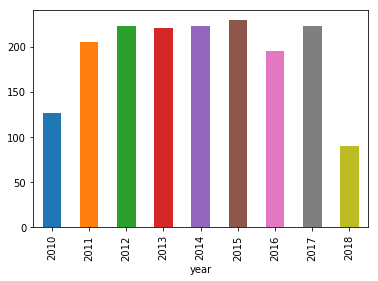

In [491]:
melon['year']=melon['review_date'].apply(lambda x:str(x)[0:4])
no = melon['year'].value_counts().tolist()
year = melon['year'].value_counts().keys().tolist()
yr_stats = pd.DataFrame({'year':year,'number':no})
yr_stats.sort_values(['year'],ascending=True).plot.bar(x='year',y='number',legend=False)

The above Bar Graph shows how many records he has reviewed per year.

,average,year
7,6.397906,2010
5,6.178404,2011
1,6.478723,2012
4,6.225962,2013
3,6.390625,2014
0,6.577236,2015
6,6.409357,2016
2,6.356481,2017
8,6.649351,2018


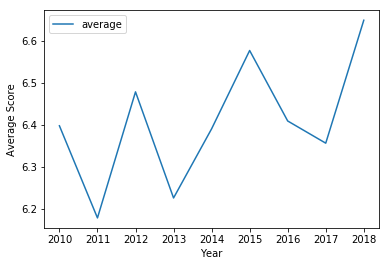

In [492]:
melon['avg_yr'] = melon.year.map(melon.groupby(['year']).score.mean())
avr = [0,0,0,0,0,0,0,0,0]
def getavg():
    y = 2010
    i = 0
    for j in range(1736):
        if int(melon.at[j,'year']) == y:
            avr[i] = melon.at[j,'avg_yr']
            i = i+1
            y = y+1
getavg()
avg_yr=pd.DataFrame({'average':avr,'year':year})
avg_yr[['year']] = avg_yr[['year']].apply(pd.to_numeric)
avg_yr = avg_yr.sort_values(['year'],ascending=True)
avg_yr.plot.line(x = 'year', y= 'average')
plt.ylabel('Average Score')
plt.xlabel('Year')
avg_yr

The above Line Graph displays the average score given every year from 2010 to 2018*.

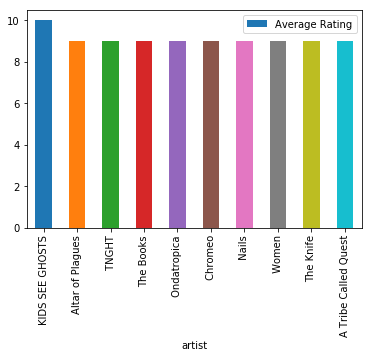

In [493]:
melon['avg_rate'] = melon.artist.map(melon.groupby(['artist']).score.mean())
copy = melon.sort_values(['avg_rate'],ascending=False)
artists = copy['artist'].tolist()
avgr = copy['avg_rate'].tolist()
avg_rate=pd.DataFrame({'artist':artists,'Average Rating':avgr})
avg_rate[:10].plot.bar(x='artist',y='Average Rating')

The graph above shows the highest rated artists.

Text(0.5,1,'Comparison of total Albums rated')

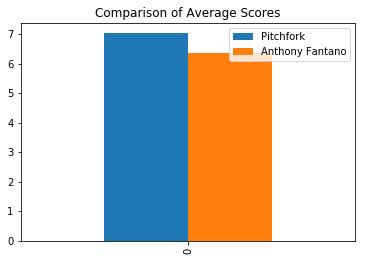

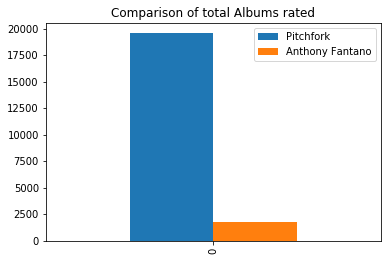

In [497]:
pitch = pd.read_csv("p4kreviews.csv",encoding='ISO-8859-1')
p = [0]
m = [0]
p[0] = pitch['score'].mean()
m[0] = melon['score'].mean()
rate=pd.DataFrame({'Pitchfork':p,'Anthony Fantano':m})
rate.plot.bar()
plt.title('Comparison of Average Scores')
p[0] = len(pitch.index)
m[0] = len(melon.index)
no=pd.DataFrame({'Pitchfork':p,'Anthony Fantano':m})
no.plot.bar()
plt.title('Comparison of total Albums rated')

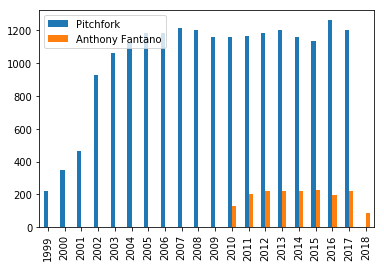

In [498]:
years = [1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
pcount = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
mcount = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] 
def pcompare():
    for i in range(20):
        for j in range(19555):
            if str(years[i]) in pitch.at[j,'date']:
                pcount[i] = pcount[i] + 1
def mcompare():
    for i in range(20):
        for j in range(1736):
            if str(years[i]) in melon.at[j,'review_date']:
                mcount[i] = mcount[i] + 1
mcompare()
pcompare()
#p4k = pd.Dataframe
compare = pd.DataFrame({'Pitchfork':pcount,'Anthony Fantano':mcount},index=years)
compare.plot.bar()